In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow_datasets as tfds
from tensorflow import keras
import tensorflow as tf
import cv2

from sklearn.model_selection import train_test_split

import pickle
from scipy import misc
import imageio
import numpy as np
import os, shutil
import pandas as pd
import matplotlib.pyplot as plt

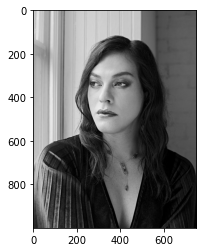

In [4]:
image_s='images_train\\humans\\f_cfsmt_4664830.jpg'

img=image.load_img(image_s)
plt.imshow(img)

In [5]:
cv2.imread(image_s).shape

(1000, 750, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255.0)
validation=ImageDataGenerator(rescale=1/255.0)

In [7]:
train_dataset = train.flow_from_directory('images_train\\',
                                         target_size=(200,200),
                                         batch_size=32,
                                         class_mode='categorical')

validation_dataset = validation.flow_from_directory('images_validation\\',
                                         target_size=(200,200),
                                         batch_size=32,
                                         class_mode='categorical')

Found 3337 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)), tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(224, activation='relu'),
    tf.keras.layers.Dense(224, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 64)       

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer = keras.optimizers.Adam(learning_rate=0.001),
             metrics = ['accuracy'])

In [14]:
model_fit = model.fit(train_dataset, epochs = 26, validation_data=validation_dataset)

Epoch 1/26
105/105 [==============================] - 40s 374ms/step - loss: 1.3280 - accuracy: 0.3075 - val_loss: 1.0998 - val_accuracy: 0.4646
Epoch 2/26
105/105 [==============================] - 39s 370ms/step - loss: 0.9636 - accuracy: 0.5454 - val_loss: 0.9819 - val_accuracy: 0.5619
Epoch 3/26
105/105 [==============================] - 39s 373ms/step - loss: 0.8320 - accuracy: 0.6377 - val_loss: 0.8031 - val_accuracy: 0.6062
Epoch 4/26
105/105 [==============================] - 39s 371ms/step - loss: 0.7705 - accuracy: 0.6820 - val_loss: 0.8021 - val_accuracy: 0.6593
Epoch 5/26
105/105 [==============================] - 39s 373ms/step - loss: 0.7291 - accuracy: 0.6925 - val_loss: 0.7874 - val_accuracy: 0.6770
Epoch 6/26
105/105 [==============================] - 39s 373ms/step - loss: 0.6827 - accuracy: 0.7273 - val_loss: 0.6990 - val_accuracy: 0.7478
Epoch 7/26
105/105 [==============================] - 40s 380ms/step - loss: 0.6251 - accuracy: 0.7522 - val_loss: 0.7084 - val_ac

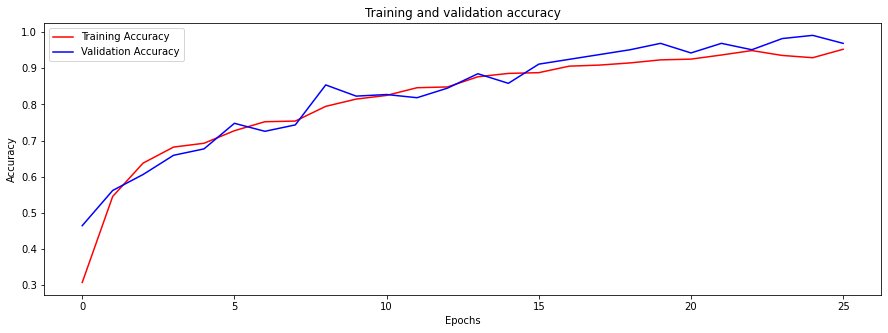

In [15]:
acc=model_fit.history['accuracy']
val_acc=model_fit.history['val_accuracy']
loss=model_fit.history['loss']
val_loss=model_fit.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(15,5))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

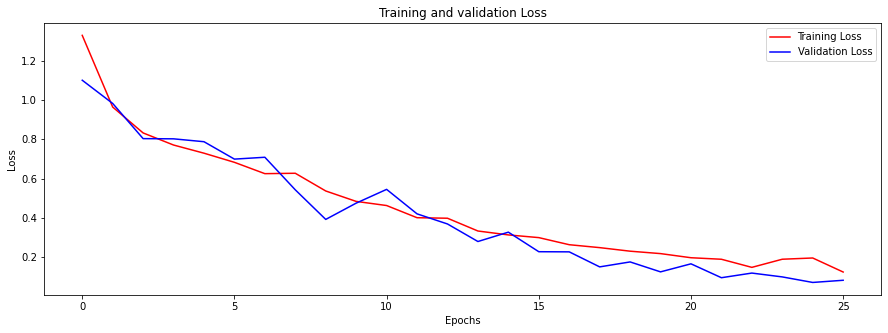

In [18]:
fig = plt.figure(figsize=(15,5))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation Loss')
plt.legend()

In [42]:
vals = validation_dataset.class_indices.values()
keys = validation_dataset.class_indices.keys()

for v, k in zip(vals, keys):
    print(k)
    print(v)

birds
0
cars
1
fruits
2
humans
3


In [43]:
def preprocess_image(path):
    img=image.load_img(path, target_size = (200,200))
    a = image.img_to_array(img)
    a = np.expand_dims(a, axis=0)
    a /= 255.
    return a

In [44]:
dir_path='images_test\\'
test_imgs = []
for i in os.listdir(dir_path):
    test_imgs.append(dir_path+i)
    
print(test_imgs)

['images_test\\5.jpg', 'images_test\\7.jpg', 'images_test\\download.jpg', 'images_test\\f_dvugq_2859249.jpg', 'images_test\\f_egkhp_2535697.jpg', 'images_test\\f_fvnih_2095723.jpg', 'images_test\\f_hkuxo_6550782.jpg', 'images_test\\f_lbyyg_9505881.jpg', 'images_test\\f_mfics_1757038.jpg', 'images_test\\f_prlzr_8139122.jpg', 'images_test\\f_qhfcw_4561264.jpg', 'images_test\\f_rqcuy_4877412.jpg', 'images_test\\f_snnsw_1456478.jpg', 'images_test\\f_umbet_6256430.jpg', 'images_test\\f_wjxal_2562248.jpg', 'images_test\\f_yrnfa_1515556.jpg', 'images_test\\images.jpg']


In [45]:
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_imgs])

In [46]:
array=model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

17/17 [==============================] - 0s 7ms/step
[1 2 1 1 3 3 0 3 2 3 0 2 0 3 0 2 3]


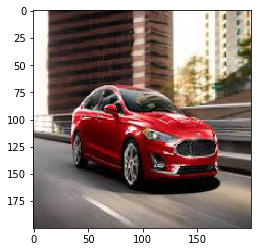

1/1 [==============================] - 0s 17ms/step
cars
1


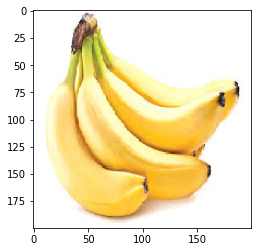

1/1 [==============================] - 0s 16ms/step
fruits
2


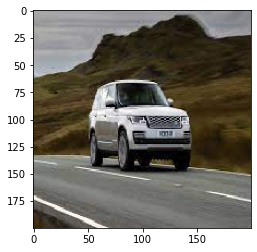

1/1 [==============================] - 0s 17ms/step
cars
1


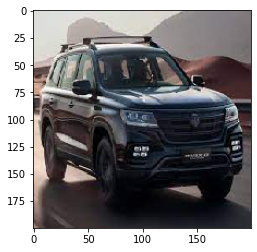

1/1 [==============================] - 0s 16ms/step
cars
1


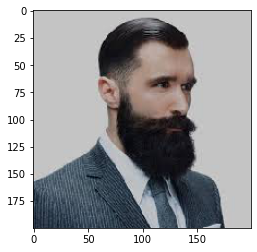

1/1 [==============================] - 0s 16ms/step
humans
3


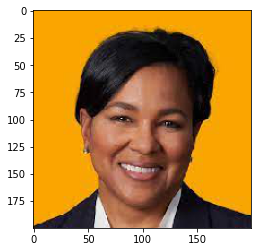

1/1 [==============================] - 0s 16ms/step
humans
3


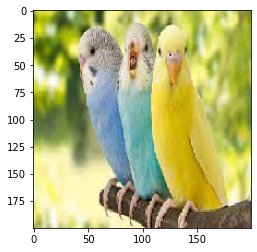

1/1 [==============================] - 0s 17ms/step
birds
0


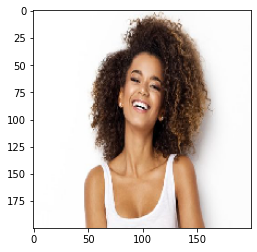

1/1 [==============================] - 0s 16ms/step
humans
3


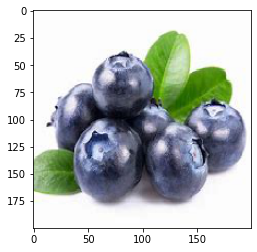

1/1 [==============================] - 0s 15ms/step
fruits
2


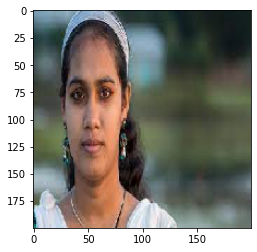

1/1 [==============================] - 0s 17ms/step
humans
3


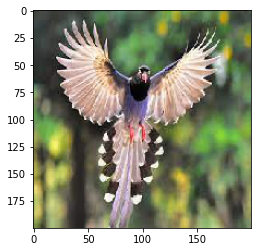

1/1 [==============================] - 0s 16ms/step
birds
0


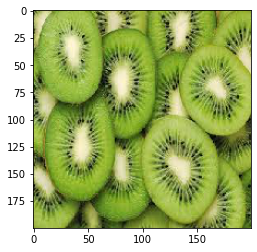

1/1 [==============================] - 0s 16ms/step
fruits
2


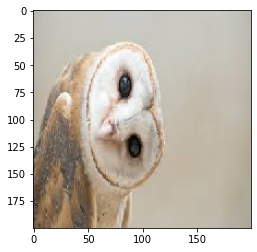

1/1 [==============================] - 0s 15ms/step
birds
0


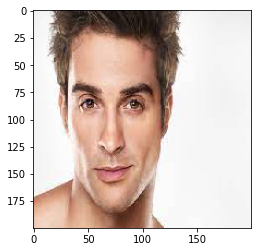

1/1 [==============================] - 0s 16ms/step
humans
3


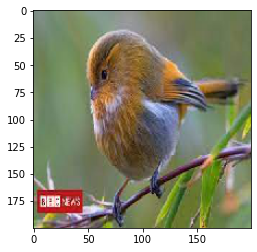

1/1 [==============================] - 0s 16ms/step
birds
0


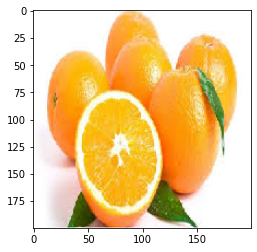

1/1 [==============================] - 0s 16ms/step
fruits
2


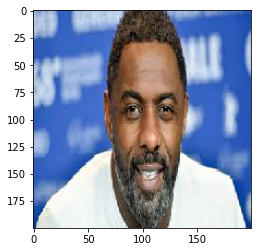

1/1 [==============================] - 0s 16ms/step
humans
3


In [47]:
dir_path='images_test\\'
vals = validation_dataset.class_indices.values()
keys = validation_dataset.class_indices.keys()

for i, a in zip(os.listdir(dir_path), answer):
    img = image.load_img(dir_path+"\\"+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X= image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    
    val = model.predict(images, batch_size = 1, verbose=1)
    for v, k in zip(vals, keys):
        if v == a:
            print(k)
            print(v)
    
    